In [1]:
#import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt #visualisation 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Year,Country of origin,Country of asylum,Authority,Application type,Stage of procedure,Cases / Persons,applied
0,2018,Afghanistan,United Kingdom of Great Britain and Northern I...,G,A,AR,C,726
1,2018,Albania,United Kingdom of Great Britain and Northern I...,G,A,AR,C,486
2,2018,Algeria,United Kingdom of Great Britain and Northern I...,G,A,AR,C,79
3,2018,Angola,United Kingdom of Great Britain and Northern I...,G,A,AR,C,30
4,2018,Antigua and Barbuda,United Kingdom of Great Britain and Northern I...,G,A,AR,C,5


In [5]:
df.tail()

,Year,Country of origin,Country of asylum,Authority,Application type,Stage of procedure,Cases / Persons,applied
38836,2023,Viet Nam,Thailand,U,R,RA,P,25
38837,2024,Sudan,Egypt,U,R,RA,P,2271
38838,2024,South Sudan,Egypt,U,R,RA,P,8
38839,2024,Central African Rep.,Cameroon,U,R,RA,P,5
38840,2024,Sudan,Jordan,U,R,RA,P,5


In [6]:
df.shape

(38841, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38841 entries, 0 to 38840
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                38841 non-null  int64 
 1   Country of origin   38841 non-null  object
 2   Country of asylum   38841 non-null  object
 3   Authority           38841 non-null  object
 4   Application type    38841 non-null  object
 5   Stage of procedure  38485 non-null  object
 6   Cases / Persons     38841 non-null  object
 7   applied             38841 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 2.4+ MB


In [8]:
df.describe()

,Year,applied
count,38841.000000,38841.000000
mean,2020.983497,416.512036
std,1.992884,3391.981853
min,2018.000000,5.000000
25%,2019.000000,6.000000
50%,2021.000000,19.000000
75%,2023.000000,93.000000
max,2024.000000,258636.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38841 entries, 0 to 38840
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                38841 non-null  int64 
 1   Country of origin   38841 non-null  object
 2   Country of asylum   38841 non-null  object
 3   Authority           38841 non-null  object
 4   Application type    38841 non-null  object
 5   Stage of procedure  38485 non-null  object
 6   Cases / Persons     38841 non-null  object
 7   applied             38841 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 2.4+ MB


In [10]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 8)


In [11]:
df = df.drop_duplicates()
df.head(10)

,Year,Country of origin,Country of asylum,Authority,Application type,Stage of procedure,Cases / Persons,applied
0,2018,Afghanistan,United Kingdom of Great Britain and Northern I...,G,A,AR,C,726
1,2018,Albania,United Kingdom of Great Britain and Northern I...,G,A,AR,C,486
2,2018,Algeria,United Kingdom of Great Britain and Northern I...,G,A,AR,C,79
3,2018,Angola,United Kingdom of Great Britain and Northern I...,G,A,AR,C,30
4,2018,Antigua and Barbuda,United Kingdom of Great Britain and Northern I...,G,A,AR,C,5
5,2018,Egypt,United Kingdom of Great Britain and Northern I...,G,A,AR,C,209
6,2018,Armenia,United Kingdom of Great Britain and Northern I...,G,A,AR,C,19
7,2018,Azerbaijan,United Kingdom of Great Britain and Northern I...,G,A,AR,C,25
8,2018,Bahrain,United Kingdom of Great Britain and Northern I...,G,A,AR,C,7
9,2018,Barbados,United Kingdom of Great Britain and Northern I...,G,A,AR,C,6


In [12]:
df.tail()

,Year,Country of origin,Country of asylum,Authority,Application type,Stage of procedure,Cases / Persons,applied
38836,2023,Viet Nam,Thailand,U,R,RA,P,25
38837,2024,Sudan,Egypt,U,R,RA,P,2271
38838,2024,South Sudan,Egypt,U,R,RA,P,8
38839,2024,Central African Rep.,Cameroon,U,R,RA,P,5
38840,2024,Sudan,Jordan,U,R,RA,P,5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38841 entries, 0 to 38840
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                38841 non-null  int64 
 1   Country of origin   38841 non-null  object
 2   Country of asylum   38841 non-null  object
 3   Authority           38841 non-null  object
 4   Application type    38841 non-null  object
 5   Stage of procedure  38485 non-null  object
 6   Cases / Persons     38841 non-null  object
 7   applied             38841 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 2.4+ MB


# Dealing with missing data in dataset

In [14]:
df.isnull().sum()

Year                    0
Country of origin       0
Country of asylum       0
Authority               0
Application type        0
Stage of procedure    356
Cases / Persons         0
applied                 0
dtype: int64

In [15]:
# a list with all missing value formats
missing_value_formats = ["n.a.","?","NA","n/a","na"," ","--","nan","UnKnown","Na","unknown"]
df= pd.read_csv("data.csv", na_values = missing_value_formats)

In [16]:
df = df.dropna(axis = 1, how ='all')

In [17]:
df.isnull().sum()

Year                    0
Country of origin       0
Country of asylum       0
Authority               0
Application type        0
Stage of procedure    356
Cases / Persons         0
applied                 0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38841 entries, 0 to 38840
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                38841 non-null  int64 
 1   Country of origin   38841 non-null  object
 2   Country of asylum   38841 non-null  object
 3   Authority           38841 non-null  object
 4   Application type    38841 non-null  object
 5   Stage of procedure  38485 non-null  object
 6   Cases / Persons     38841 non-null  object
 7   applied             38841 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 2.4+ MB


In [19]:
df = df[df['Stage of procedure'] != ' ']

In [20]:
df = df[df['Stage of procedure'] != 'nan']

In [21]:
df.isnull().sum()

Year                    0
Country of origin       0
Country of asylum       0
Authority               0
Application type        0
Stage of procedure    356
Cases / Persons         0
applied                 0
dtype: int64

# Some visuals of initial dataset

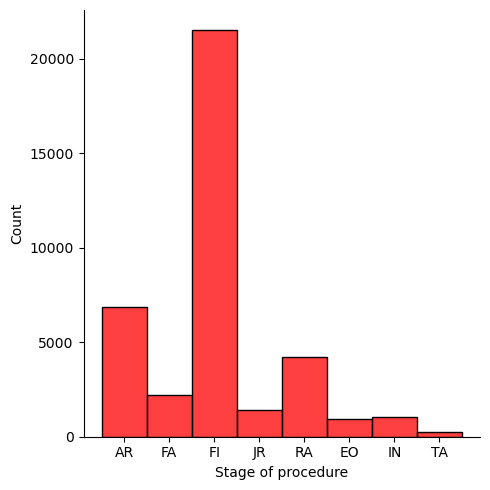

In [22]:
sns.displot(df["Stage of procedure"],color="red")

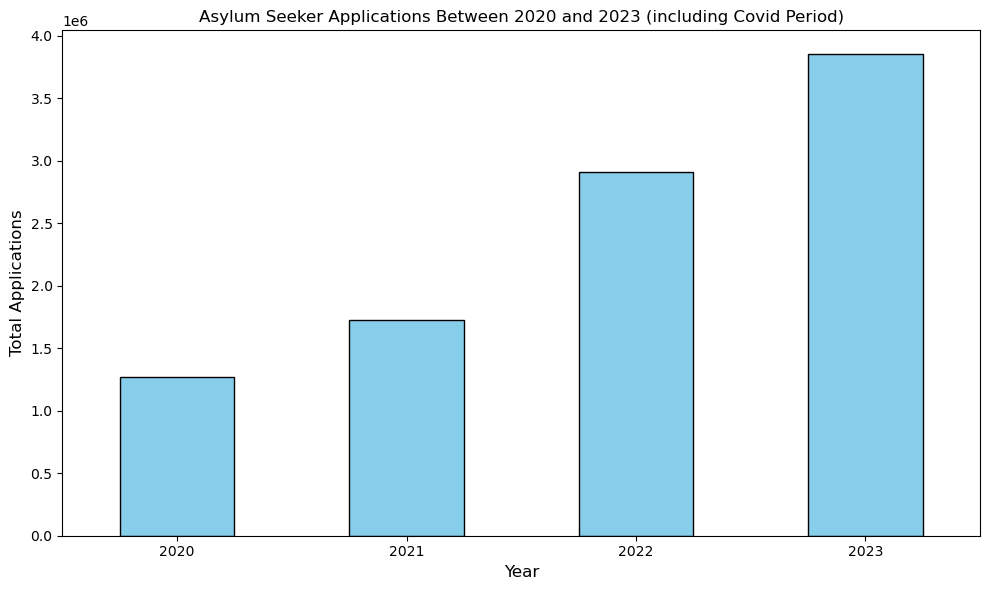

In [23]:
# Filter the data for the relevant years (2020 and 2021)
filtered_data = df[(df['Year'] >= 2020) & (df['Year'] <= 2023)]

# Summarize data by year to prepare for visualization
summary_by_year = filtered_data.groupby('Year')['applied'].sum()

# Generate the bar chart
import matplotlib.pyplot as plt

# Plot the bar chart
plt.figure(figsize=(10, 6))
summary_by_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Asylum Seeker Applications Between 2020 and 2023 (including Covid Period)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Applications', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Axes: xlabel='applied'>

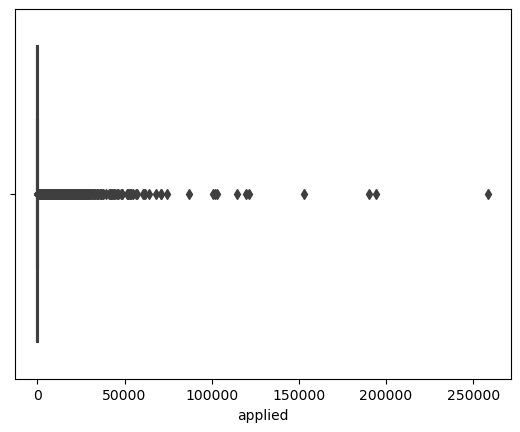

In [24]:
sns.boxplot(x=df["applied"])

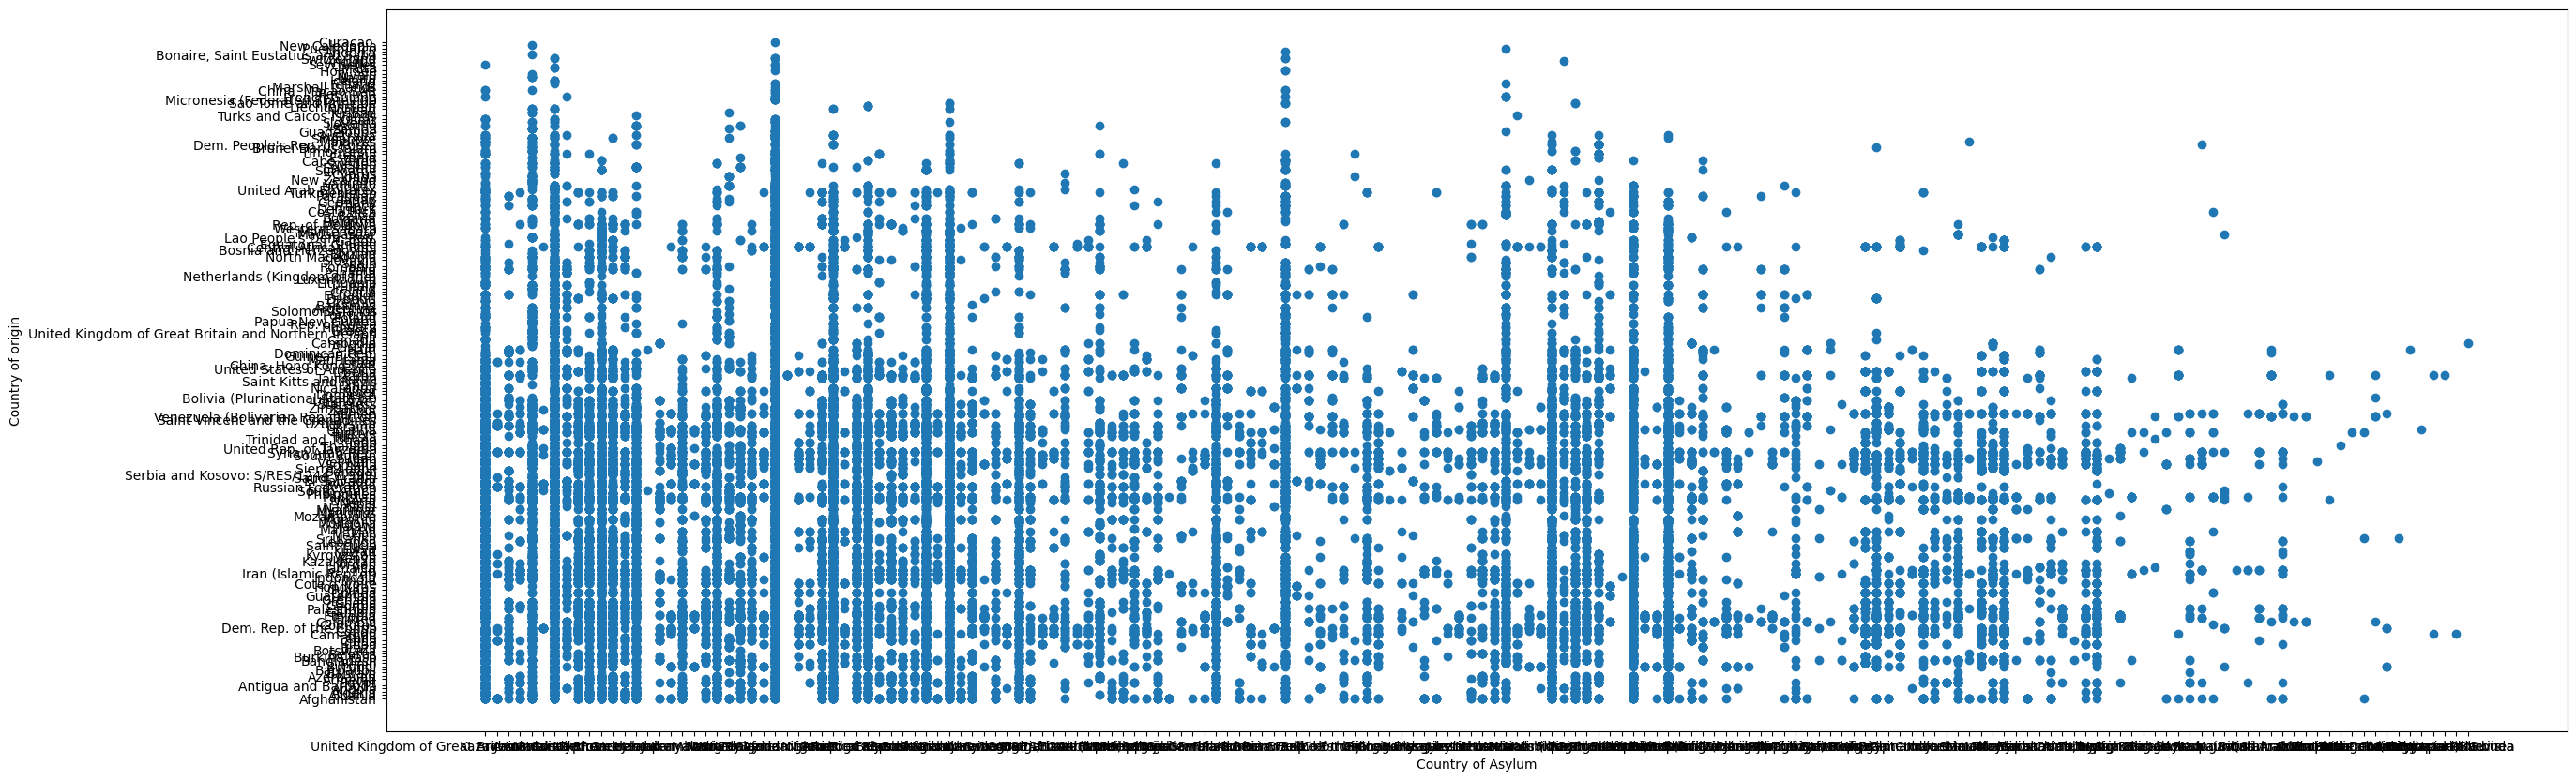

In [25]:
fig, ax = plt.subplots(figsize=(30,10))
ax.scatter(df["Country of asylum"], df["Country of origin"])
ax.set_xlabel("Country of Asylum")
ax.set_ylabel("Country of origin")
plt.show()

# Data Preperation

In [26]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
label_encoder = preprocessing.LabelEncoder()

In [27]:
df = df.apply(le.fit_transform)

In [28]:
df.isnull().sum()

Year                  0
Country of origin     0
Country of asylum     0
Authority             0
Application type      0
Stage of procedure    0
Cases / Persons       0
applied               0
dtype: int64

# Modelling and Evaluation

In [29]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [30]:
# Putting feature variable to X
X = df.drop('applied',axis=1)

# Putting response variable to y
y = df['applied']

In [31]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,Year,Country of origin,Country of asylum,Authority,Application type,Stage of procedure,Cases / Persons
4737,5,26,149,0,0,0,1
11501,0,174,58,0,2,3,1
26086,5,22,149,0,2,3,1
19047,3,163,63,0,2,3,1
1372,1,200,28,0,0,0,1


In [32]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5,random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [33]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.21      1.00      0.35      2453
           1       0.00      0.00      0.00       522
           2       0.00      0.00      0.00       395
           3       0.00      0.00      0.00       372
           4       0.00      0.00      0.00       302
           5       0.00      0.00      0.00       288
           6       0.00      0.00      0.00       228
           7       0.00      0.00      0.00       191
           8       0.00      0.00      0.00       209
           9       0.00      0.00      0.00       189
          10       0.00      0.00      0.00       171
          11       0.00      0.00      0.00       129
          12       0.00      0.00      0.00       137
          13       0.00      0.00      0.00       135
          14       0.00      0.00      0.00       125
          15       0.00      0.00      0.00       115
          16       0.00      0.00      0.00        98
          17       0.00    

In [34]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[2443    5    0 ...    0    0    0]
 [ 521    0    0 ...    0    0    0]
 [ 394    0    0 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]
0.2096455848279413


[Text(0.47291666666666665, 0.9166666666666666, 'x[2] <= 163.5\ngini = 0.946\nsamples = 27188\nvalue = [5785, 1192, 909 ... 1, 1, 1]'),
 Text(0.2125, 0.75, 'x[1] <= 1.5\ngini = 0.942\nsamples = 25029\nvalue = [5577, 1134, 865 ... 0, 1, 1]'),
 Text(0.09166666666666666, 0.5833333333333334, 'x[2] <= 7.0\ngini = 0.983\nsamples = 696\nvalue = [75, 17, 13 ... 0, 0, 0]'),
 Text(0.05, 0.4166666666666667, 'x[0] <= 5.5\ngini = 0.6\nsamples = 10\nvalue = [6, 1, 0 ... 0, 0, 0]'),
 Text(0.03333333333333333, 0.25, 'x[0] <= 0.5\ngini = 0.519\nsamples = 9\nvalue = [6, 0, 0 ... 0, 0, 0]'),
 Text(0.016666666666666666, 0.08333333333333333, 'gini = 0.667\nsamples = 3\nvalue = [1, 0, 0 ... 0, 0, 0]'),
 Text(0.05, 0.08333333333333333, 'gini = 0.278\nsamples = 6\nvalue = [5, 0, 0 ... 0, 0, 0]'),
 Text(0.06666666666666667, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0 ... 0, 0, 0]'),
 Text(0.13333333333333333, 0.4166666666666667, 'x[2] <= 55.0\ngini = 0.984\nsamples = 686\nvalue = [69, 16, 13 ... 0, 0, 0]')

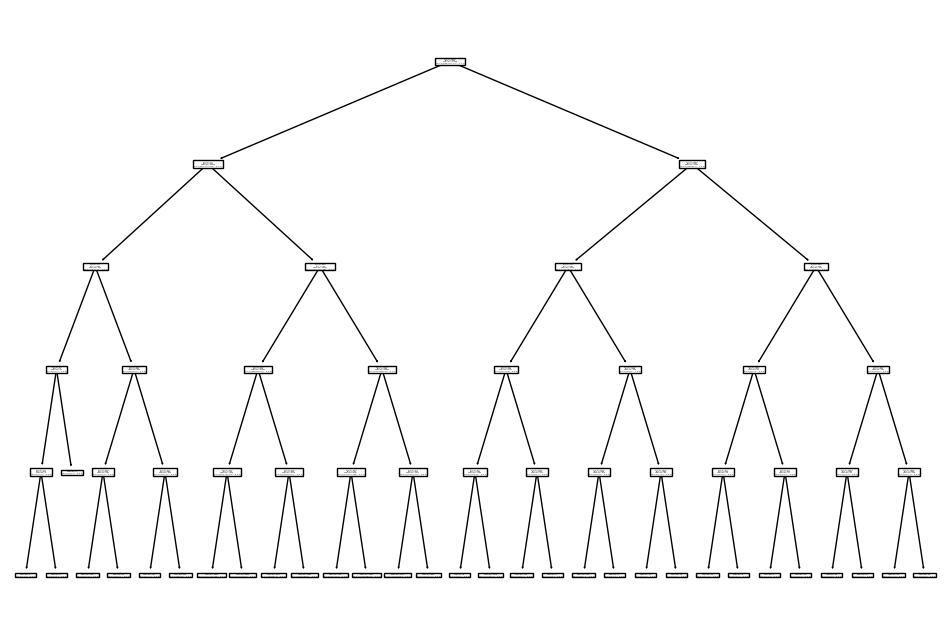

In [35]:
import matplotlib.pyplot as plt     
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(dt_default) 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score

# Create the parameter grid 
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

In [ ]:
# Find the highest accuracy value
cv_results['mean_test_score'].max()

# The depth of the tree is 9 for this accuracy

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

In [ ]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=9)
clf_gini.fit(X_train, y_train)


In [ ]:
# accuracy score
clf_gini.score(X_test,y_test)

In [ ]:
# accuracy score
clf_gini.score(X_test,y_test)

In [ ]:
#recall = recall_score(y_test, y_train, average='macro')  # Using 'macro' to handle multi-class recall if applicable

#print("Recall",recall)

In [ ]:

import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(clf_gini)

In [ ]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(clf_gini) 

In [ ]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

In [ ]:
df.isnull().sum()

In [ ]:
df["Stage of procedure"].unique()

<p>I am going to look at the stage of procedure which basically means the application status</p> 

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

In [ ]:
scaler= StandardScaler()
X_scaled=scaler.fit_transform(df)
# Optionally, reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
#setting up the parameter grid for the tuning purposes
param_grid={
    'n_clusters':[2,3,4,5,6,7,8],
    'init':['k-means++','random'],
    'n_init':[10,20],
    'max_iter':[100,300]
}

In [ ]:
#Inialising the KMeans
kmeans= KMeans(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_scaled)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters found by GridSearchCV:", best_params)



In [ ]:
# Apply the best KMeans model with optimal hyperparameters
best_kmeans = grid_search.best_estimator_

# Fit the model
best_kmeans.fit(X_scaled)

# Predict the cluster labels
labels = best_kmeans.predict(X_scaled)

# Visualization: Plot the first two principal components and color by cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="deep", s=100, alpha=0.7)
plt.title(f"KMeans Clustering with {best_params['n_clusters']} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc="best")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score:.3f}")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state = 42)

In [ ]:
#Hyperparameter Tuning along with GridSearchCV
#We need to define the parameter grid for k values and the distance metrics
param_grid={
    'n_neighbors': range(1,11), # This is to test k from 1 to 10
    'metric':['euclidean','manhattan','minkowski']
    
}

In [ ]:
#We are using GridSearchCV in order to find the best hyperoarameters
knn= KNeighborsClassifier()
grid_search=GridSearchCV(knn,param_grid,cv=5, scoring='accuracy')
grid_search.fit(X_train,y_train)

In [ ]:
#Getting the best model
best_knn=grid_search.best_estimator_
print("Best Parameters:",grid_search.best_params_)

In [ ]:
#Training and evaluating the KNN model wit the hyperparameters optimized
y_pred=best_knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print ("Accuracy:",accuracy)
print(classification_report(y_test,y_pred))

In [ ]:
#Confusion Matrix to gain better insight
confusion_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,cmap='Blues',fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#Visualize the data structures and reduce the dimensions with PCA for visualising
pca=PCA(n_components=2)
X_train_2D=pca.fit_transform(X_train)
X_test_2D=pca.transform(X_test)

In [ ]:
# Plot training data clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_train_2D[:, 0], y=X_train_2D[:, 1], hue=y_train, palette="viridis", style=y_train)
plt.title("Training Data Clusters (High vs Low Applications)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [ ]:
# Plot test data and predictions
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_test_2D[:, 0], y=X_test_2D[:, 1], hue=y_pred, palette="viridis", style=y_test)
plt.title("Test Data with KNN Predictions (High vs Low Applications)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()